In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pickle
import ast
import pandas
from numpy import array
import nbimporter
import neural_network as nn
np.set_printoptions(suppress=True)

Importing Jupyter notebook from neural_network.ipynb


In [3]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [4]:
# Read user and movie features
file = open("movie_features", "rb")
movie_features = pickle.load(file)

file = open("user_features", "rb")
user_features = pickle.load(file)

In [4]:
'''
# Read ratigns.csv to build labeled data
file = open("ratings_updated_2", "rb")
ratings = pickle.load(file)

input_data = []
input_label = []
for index, row in ratings.iterrows():
    uu = user_features[column(user_features,0).index(row['userId'])][1]
    mm = movie_features[column(movie_features,0).index(row['movieId'])][1]
    input_data.append(np.concatenate((uu, mm), axis=None))
    input_label.append(row['rating'])

file = open("input_data", "wb")
pickle.dump(input_data, file)

file = open("input_label", "wb")
pickle.dump(input_label, file)
'''

'\n# Read ratigns.csv to build labeled data\nfile = open("ratings_updated_2", "rb")\nratings = pickle.load(file)\n\ninput_data = []\ninput_label = []\nfor index, row in ratings.iterrows():\n    uu = user_features[column(user_features,0).index(row[\'userId\'])][1]\n    mm = movie_features[column(movie_features,0).index(row[\'movieId\'])][1]\n    input_data.append(np.concatenate((uu, mm), axis=None))\n    input_label.append(row[\'rating\'])\n\nfile = open("input_data", "wb")\npickle.dump(input_data, file)\n\nfile = open("input_label", "wb")\npickle.dump(input_label, file)\n'

In [5]:
# Load input data and input label
file = open("input_data", "rb")
input_data = pickle.load(file)

# Add 1 to the input to use bias
left = np.full((len(input_data),1), 1, dtype=float)
input_data = np.hstack((left,input_data))

file = open("input_label", "rb")
input_label = pickle.load(file)
input_label = [x/5 for x in input_label]

In [6]:
# Divide it for train and validation
inp = np.asarray(input_data[:-4])
inp = np.split(inp,5)

label = np.asarray(input_label[:-4])
label = np.split(label,5)

In [ ]:
# K-fold validation
errTrain = []
errTest = []

for i in range(5):
    print("Fold " + str(i+1))

    neural = nn.NeuralNetwork([140,200,160,120,80,40,1], 0.6, 500)
    #neural = nn.NeuralNetwork([140,100,50,1], learning_rate=0.1, shrink_rate=10)

    inpFold = np.vstack((inp[i%5],inp[(i+1)%5],inp[(i+2)%5],inp[(i+3)%5]))
    inpFold = np.transpose([np.transpose(inpFold)]);

    labelFold = np.hstack((label[i%5],label[(i+1)%5],label[(i+2)%5],label[(i+3)%5]))
    labelFold = np.transpose([[labelFold]])

    testInp = np.transpose([np.transpose(inp[(i+4)%5])])
    testLabel = np.transpose([np.transpose(label[(i+4)%5])])
    
    print("Training start")
    errTrain.append(neural.train(inpFold,labelFold, 1))
    print("Training end")
    print("Test error for fold "+str(i+1))
    errTest.append(neural.test(testInp, testLabel))
    
    
    file = open("weights_fold" + str(i), "wb")
    pickle.dump(neural.weights, file)
    print("")

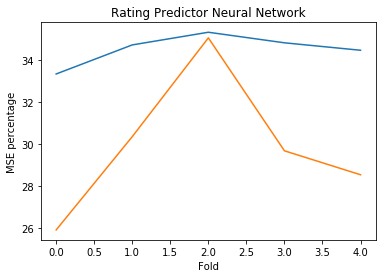

In [11]:
plt.plot(errTrain, label="Training")
plt.plot(errTest, label="Test")
plt.title('Rating Predictor Neural Network')
plt.xlabel('Fold')
plt.ylabel('MSE percentage')
plt.show()

In [23]:
### EXAMPLE RECOMMENDATION ###
# Recommend movie to user 0 
user_0_feature = user_features[10]

# Get the movies that user 0 watched before
file = open("ratings_updated_2", "rb")
ratings = pickle.load(file)

# Setup the predictor
predictor = nn.NeuralNetwork([140,200,160,120,80,40,1], 0.6, 500)
file = open("weights_fold0","rb")
weights_saved = pickle.load(file)
predictor.weights = weights_saved

# Predict rating for each movie
estimated_ratings = []
for mf in movie_features:
    uu = user_0_feature[1]
    input_data = np.concatenate((uu, mf[1]), axis=None)
    input_data = np.insert(input_data,0,1)
    inp = np.transpose([np.transpose(input_data)])
    estimated_ratings.append(predictor.forward_propogation(inp))

# Predicted movie's id
recommended_movie_id = movie_features[estimated_ratings.index(max(estimated_ratings))][0]
print(recommended_movie_id)

114382
